## RSNA: Abdomional Trauma Detection -> Exploratory Data Analysis &#x1F50D;

**Introduction:**

The competition -> RSNA Abdominal Trauma Detection aims to enhance and improve diagnosis of traumatic injuries that take place in the abdonimal cavity. The medical image modality used to study this types of injuries are the CT scans, which have became indispensable for evaluation and diagnosis. The interpretation of these scans can be difficult and time consuming.
For this reason the competition seeks to develop solutions based on AI.

**Objective:** The objective of this notebook is to explore the data, retrieving important information in order to establish and structure a robust strategy, leading to a satisfactory resolution of the competition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

plt.style.use("seaborn");

C:\Users\pedro\AppData\Local\Temp\ipykernel_264\1114704505.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn");


In [61]:
data = pd.read_csv("train.csv")
data.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   patient_id             3147 non-null   int64
 1   bowel_healthy          3147 non-null   int64
 2   bowel_injury           3147 non-null   int64
 3   extravasation_healthy  3147 non-null   int64
 4   extravasation_injury   3147 non-null   int64
 5   kidney_healthy         3147 non-null   int64
 6   kidney_low             3147 non-null   int64
 7   kidney_high            3147 non-null   int64
 8   liver_healthy          3147 non-null   int64
 9   liver_low              3147 non-null   int64
 10  liver_high             3147 non-null   int64
 11  spleen_healthy         3147 non-null   int64
 12  spleen_low             3147 non-null   int64
 13  spleen_high            3147 non-null   int64
 14  any_injury             3147 non-null   int64
dtypes: int64(15)
memory usage: 368.9 KB


In [5]:
data.isnull().sum()

patient_id               0
bowel_healthy            0
bowel_injury             0
extravasation_healthy    0
extravasation_injury     0
kidney_healthy           0
kidney_low               0
kidney_high              0
liver_healthy            0
liver_low                0
liver_high               0
spleen_healthy           0
spleen_low               0
spleen_high              0
any_injury               0
dtype: int64

In [14]:
categorical_labels = [data.columns[i] for i in range(1, 15)]
categorical_labels

['bowel_healthy',
 'bowel_injury',
 'extravasation_healthy',
 'extravasation_injury',
 'kidney_healthy',
 'kidney_low',
 'kidney_high',
 'liver_healthy',
 'liver_low',
 'liver_high',
 'spleen_healthy',
 'spleen_low',
 'spleen_high',
 'any_injury']

**Labels present**

* patient_id - A unique ID code for each patient.
* [bowel/extravasation]_[healthy/injury] - The two injury types with binary targets.
* [kidney/liver/spleen]_[healthy/low/high] - The three injury types with three target levels.
* any_injury - Whether the patient had any injury at all.

In [16]:
counts = data[categorical_labels].apply(pd.Series.value_counts)
percentages = (counts / data.shape[0]) * 100

In [17]:
counts

,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,64,3083,200,2947,182,3032,3080,321,2888,3085,354,2948,2992,2292
1,3083,64,2947,200,2965,115,67,2826,259,62,2793,199,155,855


In [18]:
percentages

,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,2.033683,97.966317,6.355259,93.644741,5.783286,96.345726,97.870988,10.200191,91.76994,98.02987,11.248808,93.676517,95.074674,72.831268
1,97.966317,2.033683,93.644741,6.355259,94.216714,3.654274,2.129012,89.799809,8.23006,1.97013,88.751192,6.323483,4.925326,27.168732


### Injury Extravasation

In [19]:
injury_corr = data[['extravasation_injury',
                    'kidney_low',
                    'kidney_high',
                    'liver_low',
                    'liver_high',
                    'liver_low',
                    'liver_high',
                    'spleen_low',
                    'spleen_high',
                    'any_injury']]

In [55]:
injury = injury_corr.loc[injury_corr['extravasation_injury'] == 1]
injury.head()

,extravasation_injury,kidney_low,kidney_high,liver_low,liver_high,liver_low,liver_high,spleen_low,spleen_high,any_injury
0,1,1,0,0,0,0,0,0,1,1
16,1,0,0,1,0,1,0,0,1,1
22,1,0,0,0,0,0,0,0,0,1
28,1,0,0,0,0,0,0,0,0,1
57,1,0,0,0,0,0,0,0,0,1


In [22]:
injury["any_injury"].value_counts()

any_injury
1    200
Name: count, dtype: int64

### Healthy Extravasation

In [23]:
healthy_corr = data[['extravasation_healthy',
                     'kidney_healthy',
                     'liver_healthy',
                     'spleen_healthy',
                     'any_injury']]

In [56]:
healthy = healthy_corr.loc[healthy_corr["extravasation_healthy"] == 1]
healthy.head()

,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy,any_injury
1,1,1,1,1,0
2,1,1,1,1,0
3,1,1,1,1,0
4,1,1,1,0,1
5,1,1,1,1,1
...,...,...,...,...,...
3142,1,1,1,1,0
3143,1,1,1,1,0
3144,1,1,1,1,0
3145,1,1,1,0,1


In [25]:
healthy["any_injury"].value_counts()

any_injury
0    2292
1     655
Name: count, dtype: int64

In [59]:
complete_healthy = healthy_corr.loc[(healthy_corr["extravasation_healthy"] == 1) & (healthy_corr["any_injury"] == 0)]
complete_healthy

,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy,any_injury
1,1,1,1,1,0
2,1,1,1,1,0
3,1,1,1,1,0
6,1,1,1,1,0
7,1,1,1,1,0
...,...,...,...,...,...
3140,1,1,1,1,0
3141,1,1,1,1,0
3142,1,1,1,1,0
3143,1,1,1,1,0


In [89]:
len(data.loc[(data["extravasation_injury"] == 0) & (data["bowel_injury"] == 0) & (data["any_injury"] == 1)])

609

In [37]:
extr_healthy_but_bowel =  data[['bowel_injury',
                                'extravasation_healthy',
                                 'any_injury']]
extr_healthy_but_bowel = extr_healthy_but_bowel.loc[(extr_healthy_but_bowel["extravasation_healthy"] == 1)]

In [39]:
extr_healthy_but_bowel = extr_healthy_but_bowel.loc[(extr_healthy_but_bowel["bowel_injury"] == 1) & (extr_healthy_but_bowel["any_injury"] == 1)]

In [40]:
extr_healthy_but_bowel["any_injury"].value_counts()

any_injury
1    46
Name: count, dtype: int64

### Only injury conditions

In [52]:
data_injury = data[["bowel_injury",
                   "extravasation_injury",
                   "kidney_low",
                    "kidney_high",
                   "liver_low",
                    "liver_high",
                   "spleen_low",
                    "spleen_high",
                   "any_injury"]]
data_injury.head()

,bowel_injury,extravasation_injury,kidney_low,kidney_high,liver_low,liver_high,spleen_low,spleen_high,any_injury
0,0,1,1,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1


### Data injury but without extravasation injury and bowel injury

In [47]:
multilabel_organs = data_injury.loc[(data_injury["extravasation_injury"] == 0) & (data_injury["bowel_injury"] == 0)]

In [51]:
multilabel_organs.head()

,bowel_injury,extravasation_injury,kidney_low,kidney_high,liver_low,liver_high,spleen_low,spleen_high,any_injury
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0


In [50]:
multilabel_organs["any_injury"].value_counts()

any_injury
0    2292
1     609
Name: count, dtype: int64

### Conclusions &#x1F3AF; &#x1F4CA;

**Healthy/Injury ratio:** 2292 healthy patients, 855 injury patients _(Imbalanced dataset)_

**Extravasation Healthy/Injury ratio:** 2292 extravasation healthy, 182 extravasation injury

**Bowel Healthy/Injury ratio:** 2292 bowel healthy, 46 bowel injury

**Liver, Kidney, Spleen Healthy/Injury ratio:** 2292 liver,kidney,spleen healthy, 609 injury

**Bowl & Extravasation Healthy/Injury ratio:** 2292 healthy, 18 bowel & extravasation injury

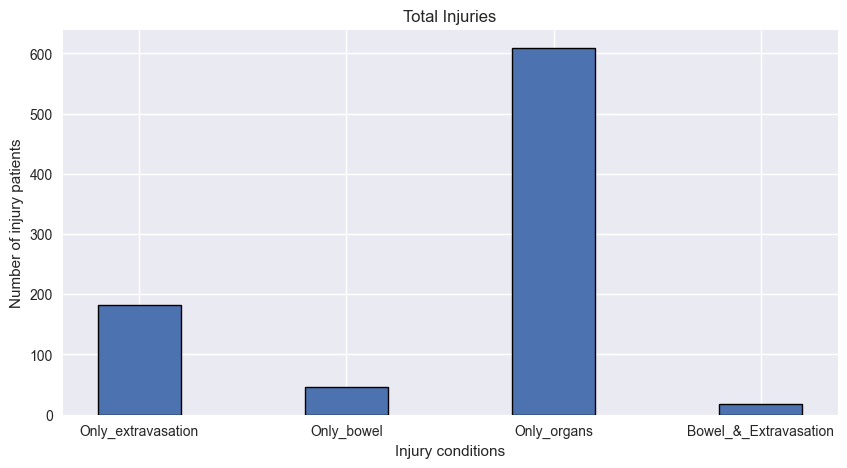

In [95]:
results = {"Only_extravasation": 182,
            "Only_bowel": 46,
            "Only_organs": 609,
            "Bowel_&_Extravasation": 18}

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(results.keys(), results.values(),
        width = 0.4,
        edgecolor="k", linewidth=1)
 
plt.xlabel("Injury conditions")
plt.ylabel("Number of injury patients")
plt.title("Total Injuries")
plt.show()

## Image Level Labels EDA &#x1F50D;

In [2]:
data_labels = pd.read_csv("image_level_labels.csv")
data_labels.head()

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation


In [3]:
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029 entries, 0 to 12028
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       12029 non-null  int64 
 1   series_id        12029 non-null  int64 
 2   instance_number  12029 non-null  int64 
 3   injury_name      12029 non-null  object
dtypes: int64(3), object(1)
memory usage: 376.0+ KB


In [4]:
data_labels.isnull().sum()

patient_id         0
series_id          0
instance_number    0
injury_name        0
dtype: int64

In [7]:
data_labels.loc[data_labels["injury_name"] == "Active_Extravasation"]

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation
...,...,...,...,...
12024,9632,3750,155,Active_Extravasation
12025,9632,3750,156,Active_Extravasation
12026,9632,3750,157,Active_Extravasation
12027,9632,3750,158,Active_Extravasation


In [8]:
data_labels.loc[data_labels["injury_name"] == "Bowel"]

,patient_id,series_id,instance_number,injury_name
105,10065,37324,48,Bowel
106,10065,37324,49,Bowel
107,10065,37324,50,Bowel
108,10065,37324,51,Bowel
109,10065,37324,52,Bowel
...,...,...,...,...
11987,8684,38440,147,Bowel
11988,8684,38440,148,Bowel
11989,8684,38440,149,Bowel
11990,8684,38440,150,Bowel


In [12]:
pacients = data_labels["patient_id"].unique().tolist()
len(pacients)

246

In [13]:
import os

def clean_image_data(patient_id, data_file):
    if os.path.isfile(data_file) == True:
        data = pd.read_csv(data_file)
        bowel = data.loc[data["injury_name"] == "Bowel"]
        active_extravasation = data.loc[data["injury_name"] == "Active_Extravasation"]
        
        data_pacient_extravasation = active_extravasation.loc[active_extravasation["patient_id"] == patient_id]
        if len(data_pacient_extravasation) > 0:
            try:
                instance_number_extravasation = data_pacient_extravasation["instance_number"].tolist()
                series_id_extravasation = data_pacient_extravasation["series_id"].tolist()[0]
                return instance_number_extravasation, series_id_extravasation, "Extravasation_injury"
            except:
                print("No records for this patient")
    
        data_pacient_bowel = bowel.loc[bowel["patient_id"] == patient_id]
        if len(data_pacient_bowel) > 0:
            try:
                instance_number_bowel = data_pacient_bowel["instance_number"].tolist()
                series_id_bowel = data_pacient_bowel["series_id"].tolist()[0]
                return instance_number_bowel, series_id_bowel, "Bowel_injury"
            except:
                print("No records for this patient")
        
    return "File selected or patient_id not valid, make sure to pass a csv file and select a pacient with any injury.."

In [19]:
from itertools import islice

len_instances = []

for i, pacient in enumerate(islice(pacients, 240, 246), start=240):
    print("Evaluating pacient: {}".format(pacient))
    x, y, z = clean_image_data(pacient, "image_level_labels.csv")
    print("Injury type: {}".format(z))
    print("Number of CT instances: {}".format(len(x)))
    print("Series of the pacient CT: {}".format(y))
    print("#--------------------------------------#")
    len_instances.append(len(x))

Evaluating pacient: 7944
Injury type: Extravasation_injury
Number of CT instances: 8
Series of the pacient CT: 35443
#--------------------------------------#
Evaluating pacient: 820
Injury type: Extravasation_injury
Number of CT instances: 9
Series of the pacient CT: 11921
#--------------------------------------#
Evaluating pacient: 8263
Injury type: Extravasation_injury
Number of CT instances: 4
Series of the pacient CT: 30011
#--------------------------------------#
Evaluating pacient: 8684
Injury type: Bowel_injury
Number of CT instances: 41
Series of the pacient CT: 38440
#--------------------------------------#
Evaluating pacient: 9528
Injury type: Extravasation_injury
Number of CT instances: 15
Series of the pacient CT: 1989
#--------------------------------------#
Evaluating pacient: 9632
Injury type: Extravasation_injury
Number of CT instances: 22
Series of the pacient CT: 3750
#--------------------------------------#


### Conclusions &#x1F3AF;

**Total patients present in the _image_level_labels.csv_:** 246 patients

**246 injury patients that match**
* 182 only extravasation injury patients
* 46 only bowel injury patients
* 18 both, bowel and extravasation injury patients